#Lung-Cancer-Prediction

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
dataset=pd.read_csv("healthData.csv")

In [94]:
dataset.isnull().sum()

Patient_ID        0
Age               0
Smoking_Status    0
Lung_Cancer       0
dtype: int64

In [95]:
dataset.head(20)

,Patient_ID,Age,Smoking_Status,Lung_Cancer
0,1,56,Non-Smoker,0
1,2,69,Non-Smoker,0
2,3,46,Non-Smoker,0
3,4,32,Non-Smoker,0
4,5,60,Smoker,1
5,6,25,Non-Smoker,0
6,7,78,Non-Smoker,0
7,8,38,Smoker,0
8,9,56,Non-Smoker,0
9,10,75,Non-Smoker,0


#Encoding the Smoking_Status because it was Categorical data

In [96]:
from sklearn.preprocessing import LabelEncoder


In [97]:
le=LabelEncoder()

In [98]:
le.fit_transform(dataset["Smoking_Status"])

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
dataset["Smoking_Status"]=le.fit_transform(dataset["Smoking_Status"])

In [100]:
dataset.head(20)

,Patient_ID,Age,Smoking_Status,Lung_Cancer
0,1,56,0,0
1,2,69,0,0
2,3,46,0,0
3,4,32,0,0
4,5,60,1,1
5,6,25,0,0
6,7,78,0,0
7,8,38,1,0
8,9,56,0,0
9,10,75,0,0


In [101]:
dataset.drop(columns=["Patient_ID"],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1992\3612651609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset)


<Axes: ylabel='Density'>

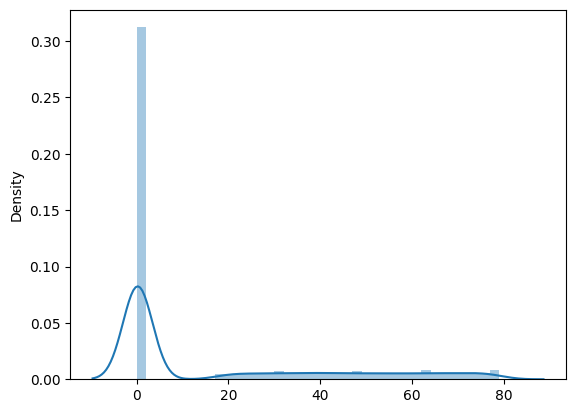

In [102]:
sns.distplot(dataset)

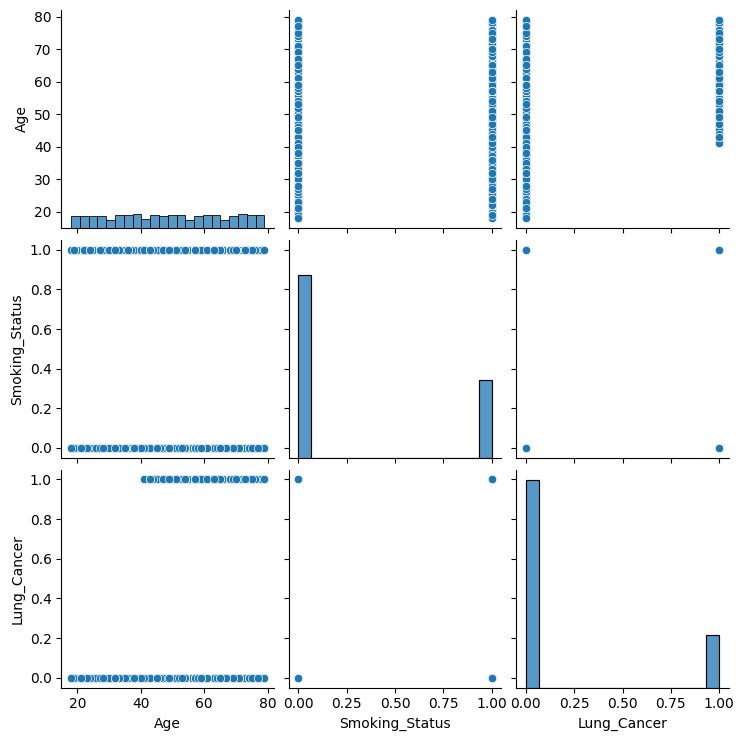

In [103]:
sns.pairplot(dataset)

<Axes: xlabel='Age', ylabel='Lung_Cancer'>

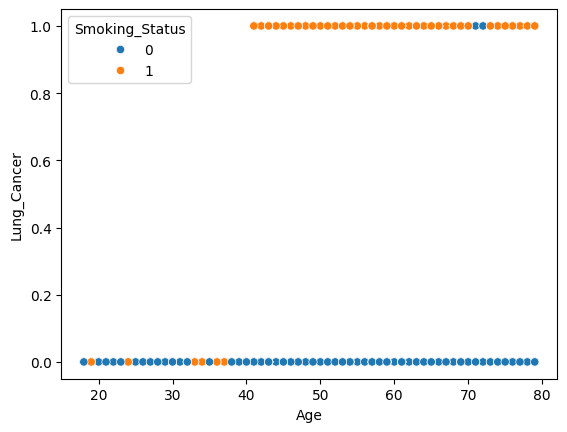

In [104]:
sns.scatterplot(x=dataset["Age"], y=dataset["Lung_Cancer"], hue=dataset["Smoking_Status"])


In [105]:
print(dataset.columns)


Index(['Age', 'Smoking_Status', 'Lung_Cancer'], dtype='object')


In [106]:
x=dataset.iloc[:,:-1]
y=dataset["Lung_Cancer"]

In [107]:
from sklearn.model_selection import train_test_split


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lr=LogisticRegression()

In [112]:
lr.fit(x_train,y_train)

LogisticRegression()

In [113]:
lr.score(x_test,y_test)

0.977

#My model accuracy is 97%

In [115]:
0.977*100

97.7

In [118]:
lr.predict([[60,1]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [121]:
predictions=lr.predict(x)

In [123]:
newData={
    "predictions":predictions
}

In [124]:
newData.to_csv("predictions.csv")

AttributeError: 'dict' object has no attribute 'to_csv'